In [1]:
# TODO: 1/31/2023 - find new light curve examples

In [2]:
# Start small and save your time.

In [3]:
# import necessary packages

import pandas as pd # for working with tables
pd.options.mode.chained_assignment = None  # default = 'warn'

import os # for finding file directory with os.getcwd()

# for calculations
import numpy as np 
import math

import matplotlib.pyplot as plt # for plotting
import matplotlib.animation as animation

# for plotting histogram with percentages
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick
from matplotlib.ticker import FormatStrFormatter

from PIL import Image # for converting plots to black-and-white
from IPython.display import HTML

from datetime import date

from ipynb.fs.full.MyFunctions_00 import *

In [4]:
print(timestamp())

06-04-23


In [5]:
# read in saved Pr tables
voids_Pr = read_data_db('VOIDS_Pr_' + 'new_' + '04-11-23') # timestamp())
walls_Pr = read_data_db('WALLS_Pr_' + 'new_' + '04-11-23') # timestamp())

read VOIDS_Pr_new_04-11-23
read WALLS_Pr_new_04-11-23


In [6]:
all_Pr = pd.concat([voids_Pr, walls_Pr], ignore_index = True)

In [7]:
voids_full = read_data('voids_full_' + 'new_' + '04-10-23') # timestamp())
walls_full = read_data('walls_full_' + 'new_' + '04-11-23') # timestamp())

read voids_full_new_04-10-23
read walls_full_new_04-11-23


In [8]:
voids_full = voids_full.dropna(subset = ['object_tag'])
walls_full = walls_full.dropna(subset = ['object_tag'])

In [9]:
voids_Pr.head()

,object_tag,num_obj,Pr
0,75.0,24.0,0.933297
1,95.0,24.0,0.948802
2,121.0,23.0,0.987329
3,127.0,22.0,0.998411
4,128.0,22.0,0.900567


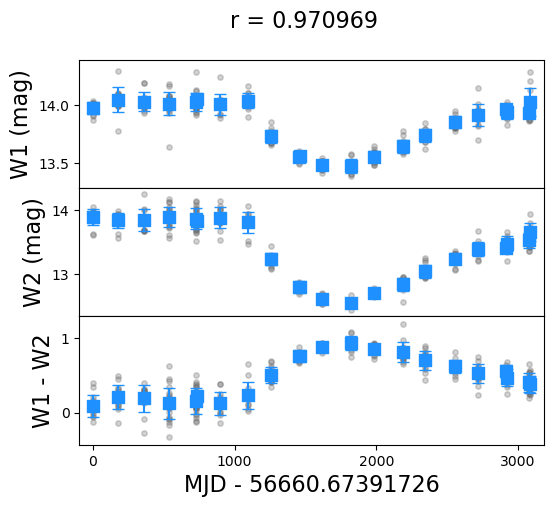

In [10]:
t = 552295
tag_num = 552295

full = walls_full

save = False

test_r = all_Pr[(all_Pr['object_tag'] == tag_num)]['Pr']
# print('r = ' + test_r.to_string(index = False))

full_tag = expand_cols(full, t)
mean = save_binned(full_tag, t)

# define three vertically-stackd subplots
fig, axs = plt.subplots(3, 1, 
                        figsize = (6, 5),
                        sharex = 'col', 
                        sharey = 'row'
                       )

plt.subplots_adjust(wspace = 0, hspace = 0)

# add title that automatically includes the name of the plotted object
fig.suptitle('r = ' + test_r.to_string(index = False), fontsize = 16)

# scatter individual measurements using the full_tag table
# different colors and bands are used for each subplot
axs[0].scatter(full_tag['mjd_binned'], 
               full_tag['w1mpro'], 
               s = 15, 
               c = 'dimgray',
               marker = "o",
               alpha = 0.3)

axs[1].scatter(full_tag['mjd_binned'], 
               full_tag['w2mpro'], 
               s = 15, 
               c = 'dimgray',
               marker = "o",
               alpha = 0.3)

axs[2].scatter(full_tag['mjd_binned'], 
               full_tag['W1-W2'], 
               s = 15, 
               c = 'dimgray',
               marker = "o",
               alpha = 0.3)

# scatter the mean points on top of the individual measurements, all on the same binned x-values
axs[0].scatter(mean['mjd_binned'], 
               mean['mean_W1'], 
               s = 65, 
               c = 'dodgerblue',
               marker = "s")

axs[1].scatter(mean['mjd_binned'], 
               mean['mean_W2'], 
               s = 65, 
               c = 'dodgerblue',
               marker = "s")

axs[2].scatter(mean['mjd_binned'], 
               mean['mean_color'], 
               s = 65, 
               c = 'dodgerblue',
               marker = "s")

# add error bars for means using the standard deviations calculated in the mean table
axs[0].errorbar(mean['mjd_binned'], 
                mean['mean_W1'],
                yerr = mean['std_W1'],
                c = "dodgerblue",
                ecolor = "dodgerblue",
                capsize = 4,
                fmt = "o")

axs[1].errorbar(mean['mjd_binned'], 
                mean['mean_W2'],
                yerr = mean['std_W2'],
                c = "dodgerblue",
                ecolor = "dodgerblue",
                capsize = 4,
                fmt = "o")

axs[2].errorbar(mean['mjd_binned'], 
                mean['mean_color'],
                yerr = mean['std_color'],
                c = "dodgerblue",
                ecolor = "dodgerblue",
                capsize = 4,
                fmt = "o")

# automatically set the axis limits for the graph based on the range of the plotted data
axs[0].set_xlim([mean['mjd_binned'].min() - 100, mean['mjd_binned'].max() + 100])
axs[0].set_ylim([full_tag['w1mpro'].min() - 0.1, full_tag['w1mpro'].max() + 0.1])
axs[1].set_ylim([full_tag['w2mpro'].min() - 0.1, full_tag['w2mpro'].max() + 0.1])
axs[2].set_ylim([full_tag['W1-W2'].min() - 0.1, full_tag['W1-W2'].max() + 0.1])

# only label the outermost axes
for ax in axs.flat:
    ax.label_outer()

# set all axis labels, including mjd that autmatically includes the value we subtracted in order to start at zero
axs[0].set_ylabel('W1 (mag)', fontsize = 16)
axs[1].set_ylabel('W2 (mag)', fontsize = 16)
axs[2].set_ylabel('W1 - W2', fontsize = 16)
axs[2].set_xlabel('MJD - ' + str(full_tag['mjd'].min()), fontsize = 16)

#     axs[0].set_yticklabels(tick_labels.astype(int))

# save figure in a unique file for each object tag

plt.rcParams.update({'font.size': 16})

if(save == True):
    fig.savefig('Figures/SVRSEF_light-curve-' + str(t) + '.png', bbox_inches = 'tight', dpi = 600)

plt.show()

In [11]:
t = 552295
full = walls_full
full_tag = expand_cols(full, t)
mean = save_binned(full_tag, t)

mean.head(30)

,object_tag,mjd_binned,mean_W1,mean_W2,mean_color,std_W1,std_W2,std_color
0,552295.0,5.0,13.973000,13.883154,0.089846,0.048918,0.126369,0.148845
1,552295.0,175.0,14.042385,13.834538,0.207846,0.108004,0.118556,0.166259
2,552295.0,365.0,14.027083,13.838667,0.188417,0.081608,0.173098,0.180285
3,552295.0,535.0,14.011304,13.887522,0.123783,0.098361,0.153581,0.211435
4,552295.0,725.0,14.021478,13.864391,0.157087,0.078121,0.164341,0.173522
5,552295.0,735.0,14.053000,13.830500,0.222500,0.014000,0.009500,0.004500
6,552295.0,895.0,14.003583,13.879583,0.124000,0.087361,0.166853,0.153984
7,552295.0,1095.0,14.036500,13.805917,0.230583,0.066950,0.160935,0.176554
8,552295.0,1255.0,13.729692,13.228615,0.501077,0.053484,0.092056,0.106243
9,552295.0,1455.0,13.550083,12.787833,0.762250,0.033210,0.055391,0.056353


In [12]:
t = 528397
full = voids_full
full_tag = expand_cols(full, t)
mean = save_binned(full_tag, t)

mean.head(30)

,object_tag,mjd_binned,mean_W1,mean_W2,mean_color,std_W1,std_W2,std_color
0,528397.0,5.0,13.973615,13.667385,0.306231,0.049115,0.115092,0.118808
1,528397.0,185.0,13.957438,13.558312,0.399125,0.063224,0.113232,0.132902
2,528397.0,365.0,13.972818,13.590091,0.382727,0.062948,0.113969,0.098882
3,528397.0,545.0,13.953071,13.553786,0.399286,0.064615,0.091377,0.124250
4,528397.0,725.0,13.916615,13.480846,0.435769,0.063142,0.107201,0.075285
5,528397.0,735.0,13.994000,13.377000,0.617000,0.000000,0.000000,0.000000
6,528397.0,895.0,13.906333,13.390917,0.515417,0.040092,0.119135,0.128128
7,528397.0,905.0,13.870000,13.387250,0.482750,0.036311,0.081897,0.086935
8,528397.0,1095.0,13.865214,13.273929,0.591286,0.136070,0.071910,0.124418
9,528397.0,1255.0,13.815143,13.227571,0.587571,0.057692,0.058383,0.086363


In [13]:
walls_test = read_data_db('walls_parent_colors_new_' + '04-11-23') # timestamp())
voids_test = read_data_db('voids_parent_colors_new_' + '04-11-23') # timestamp())

read walls_parent_colors_new_04-11-23
read voids_parent_colors_new_04-11-23


In [14]:
test = walls_test[(walls_test['object_tag'] == 552295)]
print(test.iloc[:,-14:])
test['w3mpro']

        w1mpro  w1sigmpro  w1snr  w2mpro  w2sigmpro  w2snr  w3mpro  w3sigmpro  \
196668  14.005      0.026   41.6  13.835      0.036   30.5  11.034      0.113   

        w3snr  w4mpro  w4sigmpro  w4snr  W1-W2  W2-W3  
196668    9.6   8.698      0.367    3.0   0.17  2.801  


196668    11.034
Name: w3mpro, dtype: float64

In [15]:
row = walls_test[(walls_test['object_tag'] == 552295)].iloc[:, : 15]
row # same as test_colors below

,object_tag,num_obj,Pr,vflag,RA,DEC,PLATE,FIBERID,MJD,rabsmag_NSA,Z,SFR,sSFR,BPTclass,HImass
196668,552295.0,22.0,0.970969,0,202.258569,23.685671,2664,25,54524,-20.145489,0.071707,-0.405111,-10.916666,5.0,NaN


/Users/anisharadhey/opt/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py:887: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


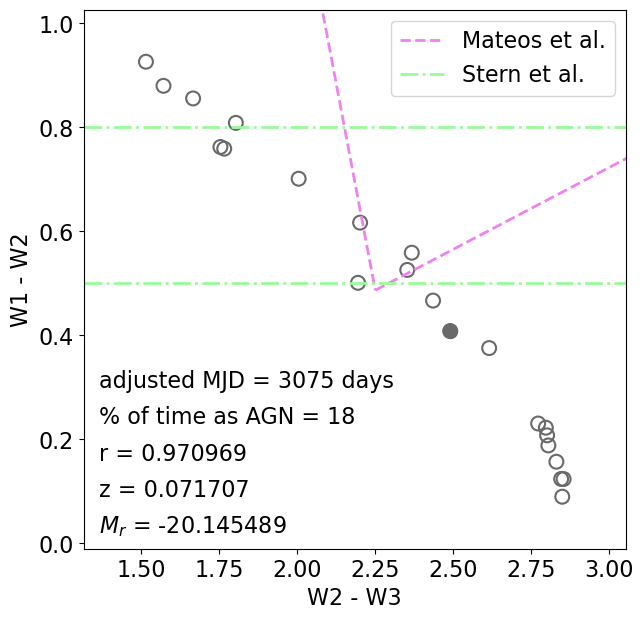

In [18]:
t = 552295
full = walls_full
full_tag = expand_cols(full, t)
mean = save_binned(full_tag, t)

# --------------------

test_colors = walls_test[(walls_test['object_tag'] == t)]

test_r = test_colors['Pr'].to_string(index = False)
test_z = test_colors['Z'].to_string(index = False)
test_Mr = test_colors['rabsmag_NSA'].to_string(index = False)

fig, ax = plt.subplots(figsize = (7, 7))
ax.set_xlim([2.75, 3.0])

ax.set_ylabel('W1 - W2')
ax.set_xlabel('W2 - W3')

# set the ranges for the line segments that make up the wedge in which AGNs form, according to Mateos et al.
xp1 = np.linspace(1.958, 6.9, 100)
xp2 = np.linspace(2.25, 6.9, 100) # ~ 2.157 (Mateos et al.)
xp3 = np.linspace(1.958, 2.25, 100)

# calculate the y values for each line segment and plot
yp1 = (0.315 * xp1) + 0.796
yp2 = (0.315 * xp2) - 0.222
yp3 = (-3.172 * xp3) + 7.624

ax.plot(xp1, yp1, color = 'violet', linestyle = 'dashed', linewidth = 2, label = 'Mateos et al.')
ax.plot(xp2, yp2, color = 'violet', linestyle = 'dashed', linewidth = 2)
ax.plot(xp3, yp3, color = 'violet', linestyle = 'dashed', linewidth = 2)


ax.axhline(y = 0.8, color = 'palegreen', linestyle = 'dashdot', linewidth = 2, label = 'Stern et al.')
ax.axhline(y = 0.5, color = 'palegreen', linestyle = 'dashdot', linewidth = 2)

ax.legend(loc = 'upper right')

# ---------------------

y = mean[(mean['object_tag'] == t)]['mean_color']
x = mean[(mean['object_tag'] == t)]['mean_W2']
mjd = mean[(mean['object_tag'] == t)]['mjd_binned']
W3 = float(test_colors['w3mpro'])

ax.scatter(x.subtract(W3), 
           y,
           s = 100,
          facecolors='none',
          marker = "o", # change symbol
#           label = 'AGN',
#           alpha = 1,
          linewidths = 1.5,
         edgecolors = 'dimgrey')

scat = ax.scatter(1, 0, color = 'dimgrey', s = 100)

label = ax.text(x.subtract(W3).min() - 0.15, y.min() + 0.21, 'MJD = ' + str(54524), fontdict = None, c = 'black', ha = 'left')

# Inner Text
ax.text(x.subtract(W3).min() - 0.15, y.min() + 0.14, '% of time as AGN = ' + get_percent(mean, 'mean_color', '>=', 0.8, False)[:-10], fontdict = None, ha = 'left')

ax.text(x.subtract(W3).min() - 0.15, y.min() + 0.07, 'r = ' + test_r, fontdict = None, ha = 'left')
ax.text(x.subtract(W3).min() - 0.15, y.min() - 0.00, 'z = ' + test_z, fontdict = None, ha = 'left')
ax.text(x.subtract(W3).min() - 0.15, y.min() - 0.07, '$M_{r}$ = ' + test_Mr, fontdict = None, ha = 'left')

ax.set_ylim([y.min() - 0.1, y.max() + 0.1])
ax.set_xlim([x.subtract(W3).min() - 0.2, x.subtract(W3).max() + 0.2])

def animate(i):
    scat.set_offsets((x.subtract(W3)[i], y[i]))
    label.set_text('adjusted MJD = ' + str(int(mjd[i])) + ' days')
    return scat,

ani = animation.FuncAnimation(fig, animate, repeat = True,
                                    frames = len(y) -  1, interval = 50)

# To save the animation using Pillow as a gif
writer = animation.PillowWriter(fps = 3,
                                metadata = dict(artist='Me'),
                                bitrate = 1800)

ani.save('Figures/iPoster-toggle-scatter-walls.gif', writer = writer, dpi = 600)

plt.show()

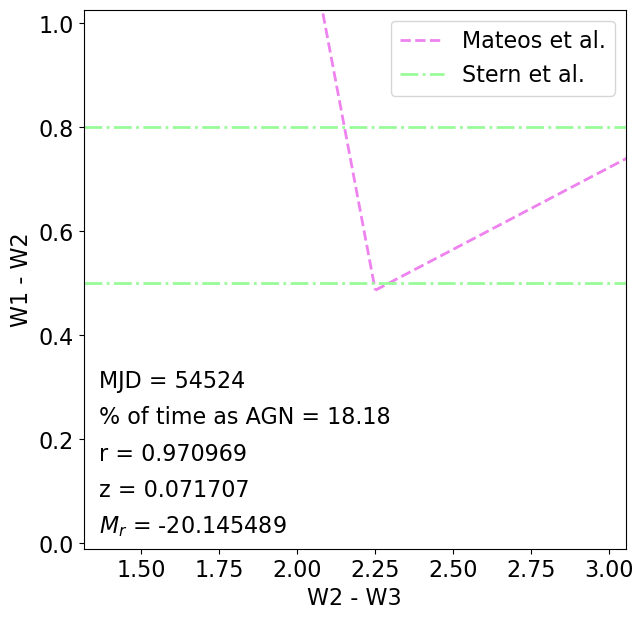

In [17]:
t = 552295
full = walls_full
full_tag = expand_cols(full, t)
mean = save_binned(full_tag, t)

# --------------------

test_colors = walls_test[(walls_test['object_tag'] == t)]

test_r = test_colors['Pr'].to_string(index = False)
test_z = test_colors['Z'].to_string(index = False)
test_Mr = test_colors['rabsmag_NSA'].to_string(index = False)

fig, ax = plt.subplots(figsize = (7, 7))
ax.set_xlim([2.75, 3.0])

ax.set_ylabel('W1 - W2')
ax.set_xlabel('W2 - W3')

# set the ranges for the line segments that make up the wedge in which AGNs form, according to Mateos et al.
xp1 = np.linspace(1.958, 6.9, 100)
xp2 = np.linspace(2.25, 6.9, 100) # ~ 2.157 (Mateos et al.)
xp3 = np.linspace(1.958, 2.25, 100)

# calculate the y values for each line segment and plot
yp1 = (0.315 * xp1) + 0.796
yp2 = (0.315 * xp2) - 0.222
yp3 = (-3.172 * xp3) + 7.624

ax.plot(xp1, yp1, color = 'violet', linestyle = 'dashed', linewidth = 2, label = 'Mateos et al.')
ax.plot(xp2, yp2, color = 'violet', linestyle = 'dashed', linewidth = 2)
ax.plot(xp3, yp3, color = 'violet', linestyle = 'dashed', linewidth = 2)


ax.axhline(y = 0.8, color = 'palegreen', linestyle = 'dashdot', linewidth = 2, label = 'Stern et al.')
ax.axhline(y = 0.5, color = 'palegreen', linestyle = 'dashdot', linewidth = 2)

ax.legend(loc = 'upper right')

# ---------------------

y = mean[(mean['object_tag'] == t)]['mean_color']
x = mean[(mean['object_tag'] == t)]['mean_W2']
mjd = mean[(mean['object_tag'] == t)]['mjd_binned']
W3 = float(test_colors['w3mpro'])

scat = ax.scatter(1, 0, color = 'dimgrey', s = 100)
label = ax.text(x.subtract(W3).min() - 0.15, y.min() + 0.21, 'MJD = ' + str(54524), fontdict = None, c = 'black', ha = 'left')

# Inner Text
ax.text(x.subtract(W3).min() - 0.15, y.min() + 0.14, '% of time as AGN = ' + get_percent(mean, 'mean_color', '>=', 0.8, False)[:-7], fontdict = None, ha = 'left')

ax.text(x.subtract(W3).min() - 0.15, y.min() + 0.07, 'r = ' + test_r, fontdict = None, ha = 'left')
ax.text(x.subtract(W3).min() - 0.15, y.min() - 0.00, 'z = ' + test_z, fontdict = None, ha = 'left')
ax.text(x.subtract(W3).min() - 0.15, y.min() - 0.07, '$M_{r}$ = ' + test_Mr, fontdict = None, ha = 'left')

ax.set_ylim([y.min() - 0.1, y.max() + 0.1])
ax.set_xlim([x.subtract(W3).min() - 0.2, x.subtract(W3).max() + 0.2])

def animate(i):
    scat.set_offsets((x.subtract(W3)[i], y[i]))
    label.set_text('adjusted MJD = ' + str(int(mjd[i])) + ' days')
    return scat,

ani = animation.FuncAnimation(fig, animate, repeat = True,
                                    frames = len(y) -  1, interval = 50)

# To save the animation using Pillow as a gif
writer = animation.PillowWriter(fps = 3,
                                metadata = dict(artist='Me'),
                                bitrate = 1800)

# ani.save('Figures/iPoster-scatter-walls.gif', writer = writer)

plt.show()

In [33]:
mean.head()

,object_tag,mjd_binned,mean_W1,mean_W2,mean_color,std_W1,std_W2,std_color
0,552295.0,5.0,13.973000,13.883154,0.089846,0.048918,0.126369,0.148845
1,552295.0,175.0,14.042385,13.834538,0.207846,0.108004,0.118556,0.166259
2,552295.0,365.0,14.027083,13.838667,0.188417,0.081608,0.173098,0.180285
3,552295.0,535.0,14.011304,13.887522,0.123783,0.098361,0.153581,0.211435
4,552295.0,725.0,14.021478,13.864391,0.157087,0.078121,0.164341,0.173522


In [34]:
print(get_percent(mean, 'mean_color', '>=', 0.8, False))
string = get_percent(mean, 'mean_color', '>=', 0.8, False)

18.18 ± 9.88


In [39]:
float(string[:-7])

18.18

In [46]:
float(string[8:])

9.88

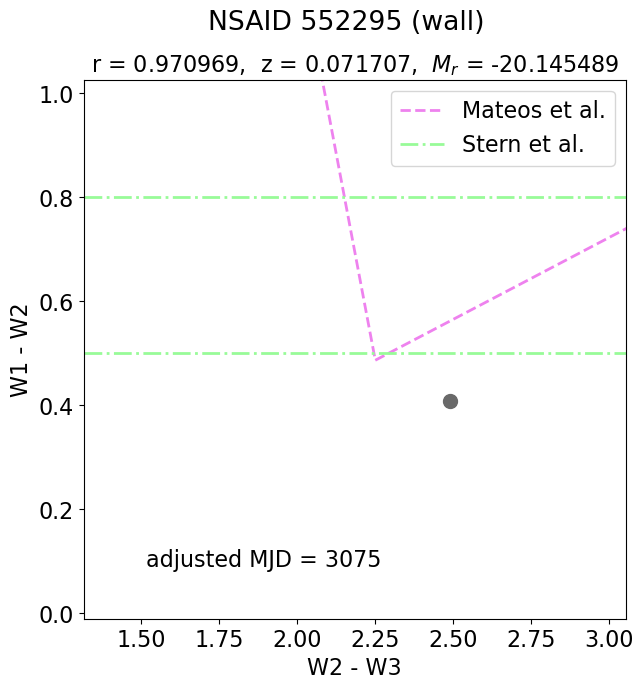

In [19]:
t = 552295
full = walls_full
full_tag = expand_cols(full, t)
mean = save_binned(full_tag, t)

# --------------------

test_colors = walls_test[(walls_test['object_tag'] == t)]

test_r = test_colors['Pr'].to_string(index = False)
test_z = test_colors['Z'].to_string(index = False)
test_Mr = test_colors['rabsmag_NSA'].to_string(index = False)

fig, ax = plt.subplots(figsize = (7, 7))
ax.set_xlim([2.75, 3.0])

fig.suptitle("NSAID " + str(t) + ' (wall)')
ax.set_title('r = ' + test_r + ',  z = ' + test_z + ',  $M_{r}$ = ' + test_Mr, fontsize = 16)

ax.set_ylabel('W1 - W2')
ax.set_xlabel('W2 - W3')

# set the ranges for the line segments that make up the wedge in which AGNs form, according to Mateos et al.
xp1 = np.linspace(1.958, 6.9, 100)
xp2 = np.linspace(2.25, 6.9, 100) # ~ 2.157 (Mateos et al.)
xp3 = np.linspace(1.958, 2.25, 100)

# calculate the y values for each line segment and plot
yp1 = (0.315 * xp1) + 0.796
yp2 = (0.315 * xp2) - 0.222
yp3 = (-3.172 * xp3) + 7.624

ax.plot(xp1, yp1, color = 'violet', linestyle = 'dashed', linewidth = 2, label = 'Mateos et al.')
ax.plot(xp2, yp2, color = 'violet', linestyle = 'dashed', linewidth = 2)
ax.plot(xp3, yp3, color = 'violet', linestyle = 'dashed', linewidth = 2)


ax.axhline(y = 0.8, color = 'palegreen', linestyle = 'dashdot', linewidth = 2, label = 'Stern et al.')
ax.axhline(y = 0.5, color = 'palegreen', linestyle = 'dashdot', linewidth = 2)

ax.legend(loc = 'upper right')

# ---------------------

y = mean[(mean['object_tag'] == t)]['mean_color']
x = mean[(mean['object_tag'] == t)]['mean_W2']
mjd = mean[(mean['object_tag'] == t)]['mjd_binned']
W3 = float(test_colors['w3mpro'])

scat = ax.scatter(1, 0, color = 'dimgrey', s = 100)
label = ax.text(x.subtract(W3).min(), y.min(), 'MJD = ' + str(54524), fontdict = None, c = 'black', ha = 'left')

ax.set_ylim([y.min() - 0.1, y.max() + 0.1])
ax.set_xlim([x.subtract(W3).min() - 0.2, x.subtract(W3).max() + 0.2])

def animate(i):
    scat.set_offsets((x.subtract(W3)[i], y[i]))
    label.set_text('adjusted MJD = ' + str(int(mjd[i])))
    return scat,

ani = animation.FuncAnimation(fig, animate, repeat = True,
                                    frames = len(y) -  1, interval = 50)

# To save the animation using Pillow as a gif
writer = animation.PillowWriter(fps = 3,
                                metadata = dict(artist='Me'),
                                bitrate = 1800)

ani.save('Figures/scatter-walls.gif', writer = writer)

plt.show()

In [20]:
# # Troubleshooting block
# x
# x.subtract(4)
# test_colors['w3mpro']
# float(test_colors['w3mpro'])float(test_colors['w3mpro'])
# x.subtract(float(test_colors['w3mpro']))
# x.subtract(float(test_colors['w3mpro']))[3]

In [21]:
# Search for similar void galaxy

search = voids_test[
    (voids_test['rabsmag_NSA'] < -20.120) &
    (voids_test['rabsmag_NSA'] > -20.170) &
    (voids_test['Pr'] > 0.85) & 
    (voids_test['Z'] > 0.06) &
    (voids_test['Z'] < 0.09) &
    (voids_test['W1-W2'] < 0.5) &
    (voids_test['object_tag'] != 8332)
]

# search = voids_test[
#     (voids_test['object_tag'] == 435718)
# ]

# already tried
remove = [8332, 19994, 47493, 49746, 59033, 66351, 80837, 86588, 
          92753, 129445, 130604, 257487, 258605, 52301, 62257, 83033,
         47745, 50828, 130866, 98244, 
         
          46525, 63199]

search['object_tag'][~search['object_tag'].isin(remove)].astype(int)
# search.iloc[:, : 15]

719        8522
805        9635
1312      14897
1405      15736
1559      18186
1725      20230
1957      46425
2138      47433
3565      59843
3746      60726
3911      62674
4555      67420
4785      69752
5878      78078
5924      78274
6542      82305
6640      82734
6740      83311
7946      92807
8401      95709
8504      96577
9018     100169
9322     129316
61330    528397
Name: object_tag, dtype: int64

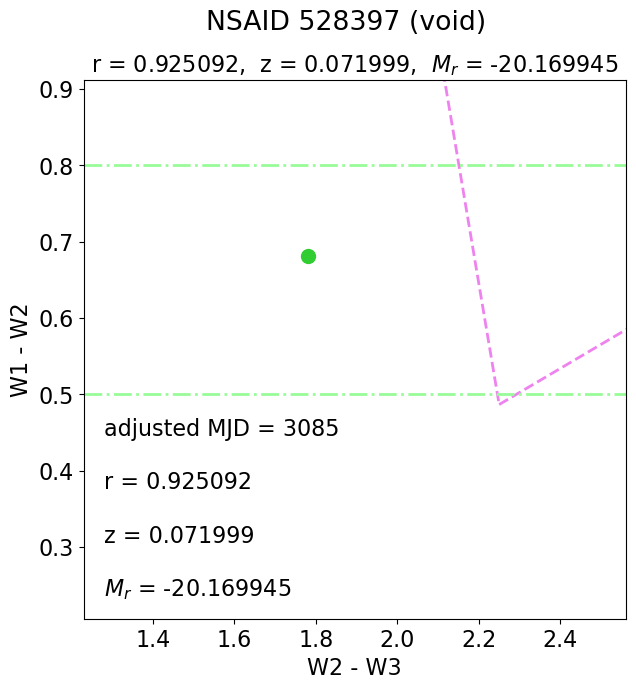

In [22]:
t = 528397 # 47433 # 63199
full = voids_full
full_tag = expand_cols(full, t)
mean = save_binned(full_tag, t)

# --------------------

test_colors = voids_test[(voids_test['object_tag'] == t)]

test_r = test_colors['Pr'].to_string(index = False)
test_z = test_colors['Z'].to_string(index = False)
test_Mr = test_colors['rabsmag_NSA'].to_string(index = False)

fig, ax = plt.subplots(figsize = (7, 7))
ax.set_xlim([2.75, 3.0])

fig.suptitle("NSAID " + str(t) + ' (void)')
ax.set_title('r = ' + test_r + ',  z = ' + test_z + ',  $M_{r}$ = ' + test_Mr, fontsize = 16)

ax.set_ylabel('W1 - W2')
ax.set_xlabel('W2 - W3')

# set the ranges for the line segments that make up the wedge in which AGNs form, according to Mateos et al.
xp1 = np.linspace(1.958, 6.9, 100)
xp2 = np.linspace(2.25, 6.9, 100) # ~ 2.157 (Mateos et al.)
xp3 = np.linspace(1.958, 2.25, 100)

# calculate the y values for each line segment and plot
yp1 = (0.315 * xp1) + 0.796
yp2 = (0.315 * xp2) - 0.222
yp3 = (-3.172 * xp3) + 7.624

ax.plot(xp1, yp1, color = 'violet', linestyle = 'dashed', linewidth = 2, label = 'Mateos et al.')
ax.plot(xp2, yp2, color = 'violet', linestyle = 'dashed', linewidth = 2)
ax.plot(xp3, yp3, color = 'violet', linestyle = 'dashed', linewidth = 2)


ax.axhline(y = 0.8, color = 'palegreen', linestyle = 'dashdot', linewidth = 2, label = 'Stern et al.')
ax.axhline(y = 0.5, color = 'palegreen', linestyle = 'dashdot', linewidth = 2)

# ax.legend(loc = 'upper right')

# ---------------------

y = mean[(mean['object_tag'] == t)]['mean_color']
x = mean[(mean['object_tag'] == t)]['mean_W2']
mjd = mean[(mean['object_tag'] == t)]['mjd_binned']

W3 = float(test_colors['w3mpro'])

scat = ax.scatter(1, 0, color = 'limegreen', s = 100)
# label = ax.text(x.subtract(W3).min(), y.min(), 'MJD = ' + str(54524), fontdict = None, c = 'black', ha = 'left')

label = ax.text(x.subtract(W3).min() - 0.15, y.min() + 0.14, 'MJD = ' + str(54524), fontdict = None, c = 'black', ha = 'left')

# Inner Text
ax.text(x.subtract(W3).min() - 0.15, y.min() + 0.07, 'r = ' + test_r, fontdict = None, ha = 'left')
ax.text(x.subtract(W3).min() - 0.15, y.min() - 0.00, 'z = ' + test_z, fontdict = None, ha = 'left')
ax.text(x.subtract(W3).min() - 0.15, y.min() - 0.07, '$M_{r}$ = ' + test_Mr, fontdict = None, ha = 'left')


ax.set_ylim([y.min() - 0.1, y.max() + 0.1])
ax.set_xlim([x.subtract(W3).min() - 0.2, x.subtract(W3).max() + 0.2])

def animate(i):
    scat.set_offsets((x.subtract(W3)[i], y[i]))
    label.set_text('adjusted MJD = ' + str(int(mjd[i])))
    return scat,

ani = animation.FuncAnimation(fig, animate, repeat = True,
                                    frames = len(y) -  1, interval = 50)

# To save the animation using Pillow as a gif
writer = animation.PillowWriter(fps = 3,
                                metadata = dict(artist='Me'),
                                bitrate = 1800)

ani.save('Figures/test-scatter-voids.gif', writer = writer)

plt.show()

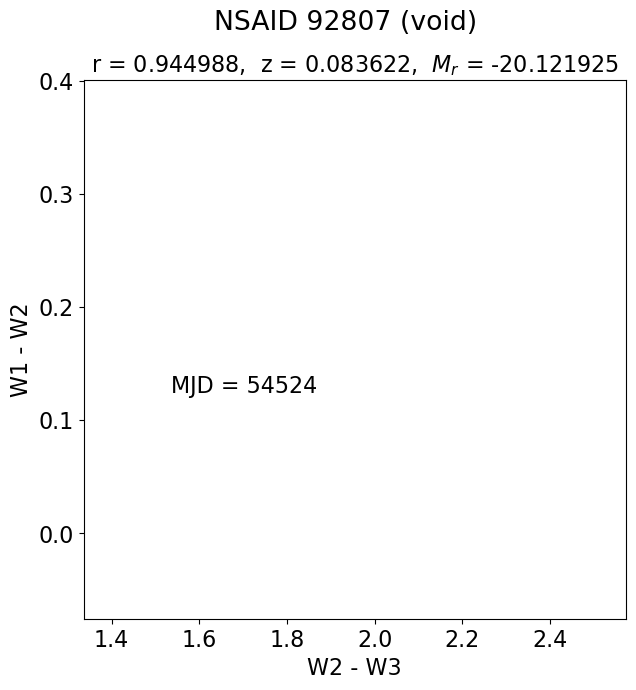

In [23]:
# Decent, but not great matches

t = 92807 # 67420 # 130866 # 98244 # 46525
full = voids_full
full_tag = expand_cols(full, t)
mean = save_binned(full_tag, t)

# --------------------

test_colors = voids_test[(voids_test['object_tag'] == t)]

test_r = test_colors['Pr'].to_string(index = False)
test_z = test_colors['Z'].to_string(index = False)
test_Mr = test_colors['rabsmag_NSA'].to_string(index = False)

fig, ax = plt.subplots(figsize = (7, 7))
ax.set_xlim([2.75, 3.0])

fig.suptitle("NSAID " + str(t) + ' (void)')
ax.set_title('r = ' + test_r + ',  z = ' + test_z + ',  $M_{r}$ = ' + test_Mr, fontsize = 16)

ax.set_ylabel('W1 - W2')
ax.set_xlabel('W2 - W3')

# set the ranges for the line segments that make up the wedge in which AGNs form, according to Mateos et al.
xp1 = np.linspace(1.958, 6.9, 100)
xp2 = np.linspace(2.25, 6.9, 100) # ~ 2.157 (Mateos et al.)
xp3 = np.linspace(1.958, 2.25, 100)

# calculate the y values for each line segment and plot
yp1 = (0.315 * xp1) + 0.796
yp2 = (0.315 * xp2) - 0.222
yp3 = (-3.172 * xp3) + 7.624

ax.plot(xp1, yp1, color = 'violet', linestyle = 'dashed', linewidth = 2, label = 'Mateos et al.')
ax.plot(xp2, yp2, color = 'violet', linestyle = 'dashed', linewidth = 2)
ax.plot(xp3, yp3, color = 'violet', linestyle = 'dashed', linewidth = 2)


ax.axhline(y = 0.8, color = 'palegreen', linestyle = 'dashdot', linewidth = 2, label = 'Stern et al.')
ax.axhline(y = 0.5, color = 'palegreen', linestyle = 'dashdot', linewidth = 2)

# ax.legend(loc = 'upper right')

# ---------------------

y = mean[(mean['object_tag'] == t)]['mean_color']
x = mean[(mean['object_tag'] == t)]['mean_W2']
mjd = mean[(mean['object_tag'] == t)]['mjd_binned']

W3 = float(test_colors['w3mpro'])

scat = ax.scatter(1, 0, color = 'limegreen', s = 100)
label = ax.text(x.subtract(W3).min(), y.min() + 0.1, 'MJD = ' + str(54524), fontdict = None, c = 'black', ha = 'left')

ax.set_ylim([y.min() - 0.1, y.max() + 0.1])
ax.set_xlim([x.subtract(W3).min() - 0.2, x.subtract(W3).max() + 0.2])

def animate(i):
    scat.set_offsets((x.subtract(W3)[i], y[i]))
    label.set_text('adjusted MJD = ' + str(int(mjd[i])))
    return scat,

ani = animation.FuncAnimation(fig, animate, repeat = True,
                                    frames = len(y) -  1, interval = 50)

# To save the animation using Pillow as a gif
writer = animation.PillowWriter(fps = 3,
                                metadata = dict(artist='Me'),
                                bitrate = 1800)

# ani.save('Figures/scatter-voids-2.gif', writer = writer)

plt.show()